In [54]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import nltk
from nltk.corpus import stopwords,wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [55]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [56]:
print(train.shape)
print(test.shape)

(27481, 4)
(3534, 3)


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [58]:
train.dropna(inplace=True)

In [59]:
train.isna().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [60]:
test.isna().sum()

textID       0
text         0
sentiment    0
dtype: int64

In [61]:
train2=train.drop(['textID','selected_text'],axis=1)

In [62]:
train2.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [63]:
test2=test.drop(['textID'],axis=1)

In [64]:
test2.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [65]:
temp = train2.groupby('sentiment').count()['text']
temp

sentiment
negative     7781
neutral     11117
positive     8582
Name: text, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

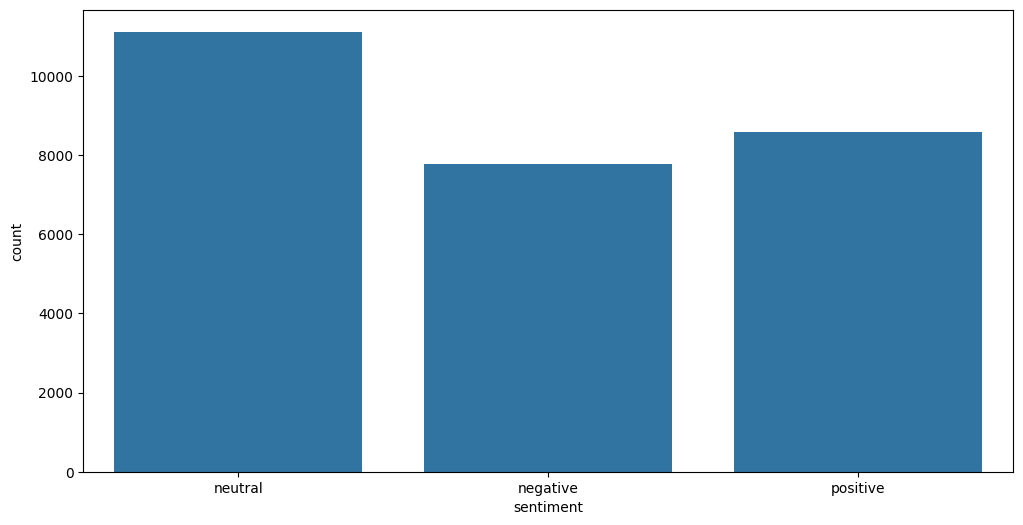

In [66]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=train2)

In [67]:
neutral_indices = train2[train2['sentiment'] == 'neutral'].index

# Specify the number of rows to delete
rows_to_delete = 3000

# Drop the specified number of rows with 'neutral' sentiment
train2 = train2.drop(neutral_indices[:rows_to_delete])

print("DataFrame after dropping specified number of rows with 'neutral' sentiment:")
print(train2)

DataFrame after dropping specified number of rows with 'neutral' sentiment:
                                                    text sentiment
1          Sooo SAD I will miss you here in San Diego!!!  negative
2                              my boss is bullying me...  negative
3                         what interview! leave me alone  negative
4       Sons of ****, why couldn`t they put them on t...  negative
6      2am feedings for the baby are fun when he is a...  positive
...                                                  ...       ...
27476   wish we could come see u on Denver  husband l...  negative
27477   I`ve wondered about rake to.  The client has ...  negative
27478   Yay good for both of you. Enjoy the break - y...  positive
27479                         But it was worth it  ****.  positive
27480     All this flirting going on - The ATG smiles...   neutral

[24480 rows x 2 columns]


In [68]:
temp = train2.groupby('sentiment').count()['text']
temp

sentiment
negative    7781
neutral     8117
positive    8582
Name: text, dtype: int64

In [69]:
print(train2.shape)
print(test2.shape)

(24480, 2)
(3534, 2)


In [70]:
temp = test2.groupby('sentiment').count()['text']
temp

sentiment
negative    1001
neutral     1430
positive    1103
Name: text, dtype: int64

In [71]:
neutral_indices = test2[test2['sentiment'] == 'neutral'].index

# Specify the number of rows to delete
rows_to_delete = 300

# Drop the specified number of rows with 'neutral' sentiment
test2 = test2.?drop(neutral_indices[:rows_to_delete])
test2

SyntaxError: invalid syntax (1253967282.py, line 7)

In [72]:
print("test dataframe after dropping specified number of rows with 'neutral' sentiment:")
print(test2)

test dataframe after dropping specified number of rows with 'neutral' sentiment:
                                                   text sentiment
0     Last session of the day  http://twitpic.com/67ezh   neutral
1      Shanghai is also really exciting (precisely -...  positive
2     Recession hit Veronique Branquinho, she has to...  negative
3                                           happy bday!  positive
4                http://twitpic.com/4w75p - I like it!!  positive
...                                                 ...       ...
3529  its at 3 am, im very tired but i can`t sleep  ...  negative
3530  All alone in this old house again.  Thanks for...  positive
3531   I know what you mean. My little dog is sinkin...  negative
3532  _sutra what is your next youtube video gonna b...  positive
3533   http://twitpic.com/4woj2 - omgssh  ang cute n...  positive

[3534 rows x 2 columns]


In [73]:
temp = test2.groupby('sentiment').count()['text']
temp

sentiment
negative    1001
neutral     1430
positive    1103
Name: text, dtype: int64

In [74]:
print(train2.shape)
print(test2.shape)

(24480, 2)
(3534, 2)


In [75]:
# Number of rows in the training set
train_rows = train2.shape[0]

# Number of rows in the testing set
test_rows = test2.shape[0]

# Calculate the train-test ratio
train_test_ratio = train_rows / test_rows

print("Train-test ratio:", train_test_ratio)


Train-test ratio: 6.926994906621392


In [76]:
# Sum up the number of rows in both train and test sets
total_rows = train2.shape[0] + test2.shape[0]

# Calculate the train-test ratio
train_percentage = train2.shape[0] / total_rows
test_percentage = test2.shape[0] / total_rows

print("train percentage:", train_percentage *100)
print("test percentage:", test_percentage*100)

train percentage: 87.38487898907688
test percentage: 12.615121010923112


In [77]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adityagupta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adityagupta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/adityagupta/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [78]:
stop_words = set(stopwords.words('english'))
additional_stop_words = {'u', 'im', 'not', 'no', 'never', 'neither', 'nor'}
stop_words |= additional_stop_words

In [79]:
stop_words = set(stopwords.words('english'))

# Dictionary for common typos and slangs
typos_slangs = {
    "dont": "don't",
    "cant": "can't",
    "lol": "laugh out loud",
    "brb": "be right back",
    "jk": "just kidding",
    # Add more typos and slangs as needed
}

def clean_text(text):
    text = str(text).lower()
    
    # Use raw strings (prefix with r) to prevent SyntaxWarnings
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    
    # Replace typos and slangs
    for typo, correction in typos_slangs.items():
        text = text.replace(typo, correction)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tagged_tokens = nltk.pos_tag(tokens)
    lemmatized_tokens = [
        lemmatizer.lemmatize(token, pos=pos[0].lower()) if pos[0].lower() in ['n', 'v', 'a']
        else lemmatizer.lemmatize(token)
        for token, pos in tagged_tokens
    ]

    # Handle negations
    processed_tokens = []
    negation = False
    for token in lemmatized_tokens:
        if token in {'not', 'no', 'never', 'neither', 'nor', "cannot", "won't"}:
            negation = True
        elif negation:
            token = 'not_' + token
            negation = False
        processed_tokens.append(token)
    
    processed_text = ' '.join([word for word in processed_tokens if word not in stop_words])
    
    return processed_text


In [80]:
train2['text'] = train2['text'].apply(lambda x:clean_text(x))

In [81]:
test2['text'] = test2['text'].apply(lambda x:clean_text(x))

In [82]:
train2.head()


,text,sentiment
1,sooo sad miss san diego,negative
2,bos bully,negative
3,interview leave alone,negative
4,son couldnt put release already buy,negative
6,feeding baby fun smile coo,positive


In [83]:
train2.isna().sum()

text         0
sentiment    0
dtype: int64

In [84]:
test2.isna().sum()

text         0
sentiment    0
dtype: int64

In [85]:
train2.to_csv('processed_train_data.csv', index=False)
test2.to_csv('processed_test_data.csv', index=False)

In [86]:
train2['temp_list'] = train2['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train2['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']

In [87]:
temp

,Common_words,count
0,im,2727
1,get,2726
2,go,2393
3,day,2181
4,n't,2015
5,good,1425
6,like,1295
7,love,1265
8,work,1253
9,u,1026


In [88]:
Positive_sent = train2[train2['sentiment']=='positive']
Negative_sent = train2[train2['sentiment']=='negative']
Neutral_sent = train2[train2['sentiment']=='neutral']

In [89]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive

,Common_words,count
0,day,1326
1,good,1045
2,love,1040
3,happy,839
4,get,810
5,im,738
6,go,682
7,mother,667
8,thanks,546
9,great,477


In [90]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative

,Common_words,count
1,get,953
2,n't,949
3,go,838
4,miss,656
5,like,476
6,ca,467
7,work,466
8,day,404
9,feel,402
10,sad,387


In [91]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral

,Common_words,count
1,go,873
2,im,768
3,n't,608
4,day,451
5,work,449
6,laugh,353
7,loud,351
8,like,346
9,u,345
10,time,329


In [92]:
raw_text = [word for word_list in train2['temp_list'] for word in word_list]

In [93]:
def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in train2[train2.sentiment != sentiment]['temp_list']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in train2[train2.sentiment == sentiment]['temp_list']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [94]:
Unique_Positive= words_unique('positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive

The top 20 unique words in Positive Tweets are:


,words,count
0,fantastic,38
1,congratulation,30
2,thnx,10
3,henrie,9
4,greeting,8
5,blessing,7
6,not_wait,7
7,clever,7
8,curious,7
9,mothersday,6


In [95]:
Unique_Negative= words_unique('negative', 20, raw_text)
print("The top 20 unique words in Negative Tweets are:")
Unique_Negative

The top 20 unique words in Negative Tweets are:


,words,count
0,dammit,19
1,not_luck,10
2,depressed,9
3,allergic,7
4,saddest,7
5,not_funny,6
6,sob,6
7,wrist,6
8,anxiety,6
9,guilt,6


In [96]:
Unique_Neutral= words_unique('neutral', 20, raw_text)
print("The top 20 unique words in Neutral Tweets are:")
Unique_Neutral

The top 20 unique words in Neutral Tweets are:


,words,count
0,wishing,5
1,hiya,5
2,mite,5
3,pfft,5
4,ant,5
5,sumthin,4
6,depot,4
7,trippin,4
8,indoors,4
9,extend,4


In [97]:
test2.head()

,text,sentiment
0,last session day,neutral
1,shanghai also really excite precisely skyscrap...,positive
2,recession hit veronique branquinho quit compan...,negative
3,happy bday,positive
4,like,positive


In [98]:
from sklearn.feature_extraction.text import CountVectorizer #Data transformation
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
# from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder #Variable encoding and decoding for XGBoost

In [99]:
train2.head()

,text,sentiment,temp_list
1,sooo sad miss san diego,negative,"[sooo, sad, miss, san, diego]"
2,bos bully,negative,"[bos, bully]"
3,interview leave alone,negative,"[interview, leave, alone]"
4,son couldnt put release already buy,negative,"[son, couldnt, put, release, already, buy]"
6,feeding baby fun smile coo,positive,"[feeding, baby, fun, smile, coo]"


In [100]:
#Text splitting
tokens_text = train2.temp_list
#Unique word counter
tokens_counter = [item for sublist in train2.temp_list for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  22543


In [101]:
tokens_text[1]

['sooo', 'sad', 'miss', 'san', 'diego']

In [102]:
tokens_text[1]+tokens_text[2]

['sooo', 'sad', 'miss', 'san', 'diego', 'bos', 'bully']

In [103]:
tokens_text[200]

['sleep', 'lose', 'voice', 'couple', 'day', 'ago']

In [104]:
Positive_sent.temp_list

6                         [feeding, baby, fun, smile, coo]
9        [journey, wow, u, become, cooler, hehe, possible]
11       [really, really, like, song, love, story, tayl...
21       [play, ghost, online, really, interest, new, u...
25              [free, fillin, app, ipod, fun, im, addict]
                               ...                        
27467       [morning, twitfriends, welcome, new, follower]
27474    [get, early, feel, good, day, walk, work, im, ...
27475                                   [enjoy, ur, night]
27478    [yay, good, enjoy, break, probably, need, hect...
27479                                              [worth]
Name: temp_list, Length: 8582, dtype: object

In [105]:
Negative_sent.temp_list

1                            [sooo, sad, miss, san, diego]
2                                             [bos, bully]
3                                [interview, leave, alone]
4               [son, couldnt, put, release, already, buy]
12                   [sharpie, run, dangerously, low, ink]
                               ...                        
27464    [rec, gametrying, not_to, crythe, pain, muchi,...
27470    [laugh, loud, know, hahadid, fall, asleep, get...
27472                          [want, visit, animal, late]
27476    [wish, could, come, see, u, denver, husband, l...
27477    [ive, wonder, rake, client, make, clear, net, ...
Name: temp_list, Length: 7781, dtype: object

In [106]:
Neutral_sent.temp_list

7413                                [ca, n't, believe, er]
7416                                    [get, zion, tweet]
7418     [know, fall, right, time, like, right, middle,...
7420                     [haha, whole, world, laugh, loud]
7421                        [pack, last, day, youth, camp]
                               ...                        
27468    [grill, mushroom, olive, feta, cheese, coffee,...
27469                      [day, till, bh, come, back, la]
27471    [im, defy, gravity, nobody, alll, oz, not_wiza...
27473    [spoke, yesterday, u, didnt, respond, girl, wa...
27480                    [flirt, go, atg, smile, yay, hug]
Name: temp_list, Length: 8117, dtype: object

In [107]:
stop_words = stopwords.words('english')

In [108]:
#Initial Bag of Words
# bow_counts = CountVectorizer()

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2))

In [109]:
#Creation of encoding related to train dataset
# X_train_bow = bow_counts.fit_transform(train2.text)
X_train_bow = tfidf.fit_transform(train2.text)


In [110]:
#Transformation of test dataset with train encoding
# X_test_bow = bow_counts.transform(test2.text)
X_test_bow = tfidf.transform(test2.text)

In [111]:
X_test_bow

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 29103 stored elements and shape (3534, 134878)>

In [112]:
y_train_bow = train2['sentiment']


In [113]:
y_test_bow = test2['sentiment']

In [114]:
y_test_bow.value_counts() / y_test_bow.shape[0]

sentiment
neutral     0.404641
positive    0.312111
negative    0.283248
Name: count, dtype: float64

In [115]:
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=200)
model1.fit(X_train_bow, y_train_bow)

LogisticRegression(C=1, max_iter=200, solver='liblinear')

In [116]:
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  70.17543859649122


In [117]:
# Preprocess the input sentence

input_sentence = "i am not nice"
processed_input= [clean_text(input_sentence)]
processed_input
X_input =  tfidf.transform(processed_input)

# Make predictions
predicted_label = model1.predict(X_input)

print(f"{processed_input} Predicted class label:", predicted_label)

['not_nice'] Predicted class label: ['negative']


In [118]:
# Preprocess the input sentence

input_sentence = "i am bad"
processed_input= [clean_text(input_sentence)]
X_input =  tfidf.transform(processed_input)

# Make predictions
predicted_label = model1.predict(X_input)

print("Predicted class label:", predicted_label)

Predicted class label: ['negative']


In [119]:
from sklearn.naive_bayes import GaussianNB

In [120]:
# Get the set of English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Additional words to be added to the stop words set
additional_stop_words = {'u', 'im'}

# Concatenate the stop words set with additional words
stop_words |= additional_stop_words

In [121]:
input_sentence = "cleanly"
processed_input= [clean_text(input_sentence)]
processed_input

['cleanly']

In [122]:
import pickle

# Save CountVectorizer and GaussianNB classifier into a pickle file
with open('text_classifier.pkl', 'wb') as f:
    pickle.dump((bow_counts, model1), f)

NameError: name 'bow_counts' is not defined

In [ ]:
# Preprocess the input sentence

input_sentence = "bad"
processed_input= [clean_text(input_sentence)]
X_input =  tfidf.transform(processed_input)

# Make predictions
predicted_label = model1.predict(X_input)

print("Predicted class label:", predicted_label)

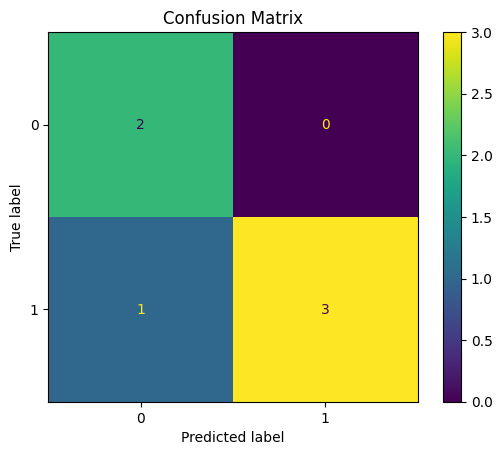

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example true labels and predicted labels
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [1, 0, 0, 1, 0, 1]

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

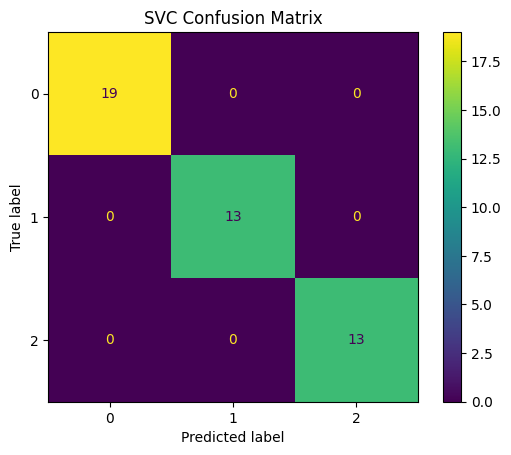

In [124]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.3, random_state=42
)

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("SVC Confusion Matrix")
plt.show()